In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from tqdm import tqdm
from json import JSONDecodeError
import itertools

In [ ]:
%load_ext autoreload
%autoreload 2

In [15]:
from api_info import *
from credentials import *
from api_functions import *
from stat_functions import *

In [16]:
d = retrieve_espn_data(swid,espn_s2,league_id)
data = clean_data(d)

Player has irregular eligible slots: Elias N. Pettersson has slots [10, 4, 6, 7, 8]


In [17]:
skater_cats = [
    "FOW",
    "assists",
    "average_time_on_ice",
    "blocks",
    "goals",
    "hits",
    "penalty_minutes",
    "plus_minus",
    "power play points",
    "shots_on_goal",
]

In [18]:
scoring_weights = {
    "FOW": 1,
    "assists": 1,
    "average_time_on_ice": 1,
    "blocks": 1,
    "goals": 1,
    "hits": 1,
    "penalty_minutes": 1,
    "plus_minus": 0,
    "power play points": 1,
    "shots_on_goal": 1,
}

In [32]:
played_players = get_player_scores(data,scoring_weights,opp_id = None)

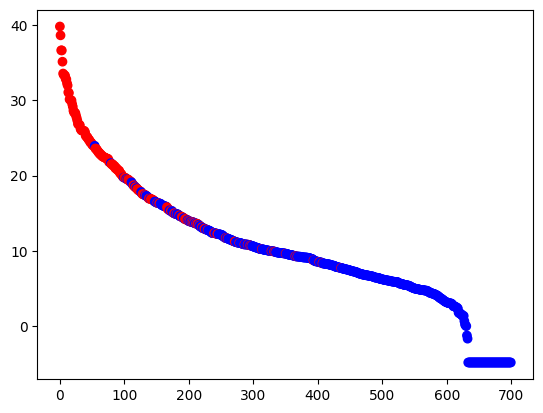

In [33]:
num_players = 700
regime = "AT"
top_players = played_players.sort_values(
    by=f"sum scores {regime}", ascending=False
).iloc[:num_players]
not_in_team = top_players[top_players["LeagueTeamID"].isna()]
colours = ["blue" if x else "red" for x in top_players["LeagueTeamID"].isna()]
plt.scatter(range(num_players), top_players[f"sum scores {regime}"], c=colours)

In [36]:
played_players = get_player_scores(data,scoring_weights,opp_id = 3)

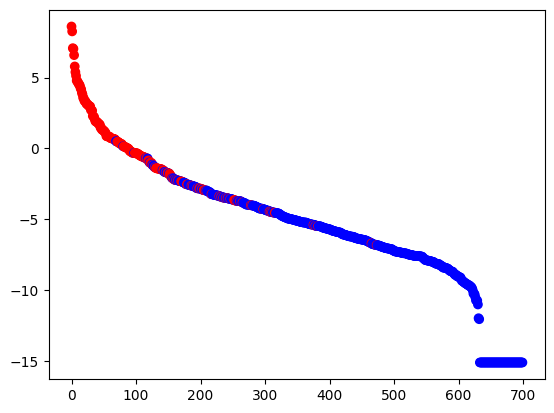

In [37]:
num_players = 700
regime = "AT"
top_players = played_players.sort_values(
    by=f"sum scores {regime}", ascending=False
).iloc[:num_players]
not_in_team = top_players[top_players["LeagueTeamID"].isna()]
colours = ["blue" if x else "red" for x in top_players["LeagueTeamID"].isna()]
plt.scatter(range(num_players), top_players[f"sum scores {regime}"], c=colours)

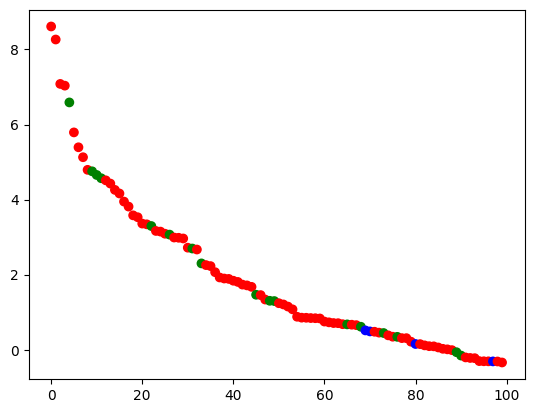

In [45]:
num_players = 100
regime = "AT"
top_players = played_players.sort_values(
    by=f"sum scores {regime}", ascending=False
).iloc[:num_players]
not_in_team = top_players[top_players["LeagueTeamID"].isna()]
colours = ["blue" if x else "red" for x in top_players["LeagueTeamID"].isna()]
colours = ["green" if x else colours[ind] for ind,x in enumerate(list(top_players["LeagueTeamID"]==8))]
plt.scatter(range(num_players), top_players[f"sum scores {regime}"], c=colours)

In [48]:
not_in_team

,ID,Name,TeamID,LeagueTeamID,Position,InjuryStatus,sum scores proj,sum scores 15,sum scores 30,sum scores AT,games_playedproj,games_played15,games_played30,games_playedAT
137,5080143,Logan Cooley,129764,NaN,C,ACTIVE,-4.166318,-5.126969,-1.552004,0.514786,80.0,1.0,4.0,51.0
1112,4064781,Mathieu Olivier,29,NaN,C,ACTIVE,-23.064582,0.623179,-4.097049,0.488135,NaN,2.0,8.0,57.0
288,2593315,Jason Zucker,2,NaN,LWRW,ACTIVE,-6.226188,3.134638,-2.512034,0.153252,72.0,2.0,7.0,53.0
770,4587985,Mark Kastelic,1,NaN,C,ACTIVE,-23.064582,-13.061161,-14.050227,-0.310562,NaN,2.0,4.0,49.0
